### setup

In [90]:
import sympy as sym
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt

### Problem 1

#### insert image

### Problem 2

In [70]:
def x_init_gen(dim):
    x_inits = (np.zeros((dim,1)) - 10) +  np.random.rand(dim,1) * 20
    return x_inits

In [71]:
#generate random nxn diagonal matrix with elements betwen 0.5 - 1.9
def Q_gen(dim):
    I = np.identity(dim)
    rand_arr = (np.zeros((dim,1)) + 0.5) +  np.random.rand(dim,1) * 1.4
    Q = I * rand_arr
    return Q

In [72]:
#set up symbollic f and grad_f for lambda evals
x = sym.MatrixSymbol('x', n, 1)
Q = sym.MatrixSymbol('Q', n, n)
f = sym.Rational(1,2) * x.T * Q * x
grad_f = f.diff(x)
f_lam = sym.lambdify([x, Q], f)
grad_f_lam = sym.lambdify([x, Q], grad_f)

In [76]:
#define our function that performs gradient descent on ambigiously dimensonal funcs
#creates random x and Q per descent
def ambig_dim_grad_desc(dim):
    eps = 0.1
    num_its = 0
    Q = Q_gen(dim)
    x = x_init_gen(dim)
    grad = grad_f_lam(x, Q)
    mag_grad = np.linalg.norm(grad)
    while (mag_grad > eps):
        x_next = x - grad
        grad = grad_f_lam(x_next, Q)
        mag_grad = np.linalg.norm(grad)
        x = x_next
        num_its = num_its + 1
    return num_its
    
    

In [96]:
n_vals = np.arange(1,101)
ave_it_vals = np.zeros(100)
#iterate over n = 1-100
for n in range(1,101):
    # perform 100 random inits per n and average number of its
    ave = 0
    for i in range(100):
        ave = ave + (1/100 * ambig_dim_grad_desc(n))
    # add averaged val to list
    ave_it_vals[n-1] = ave


<IPython.core.display.Javascript object>


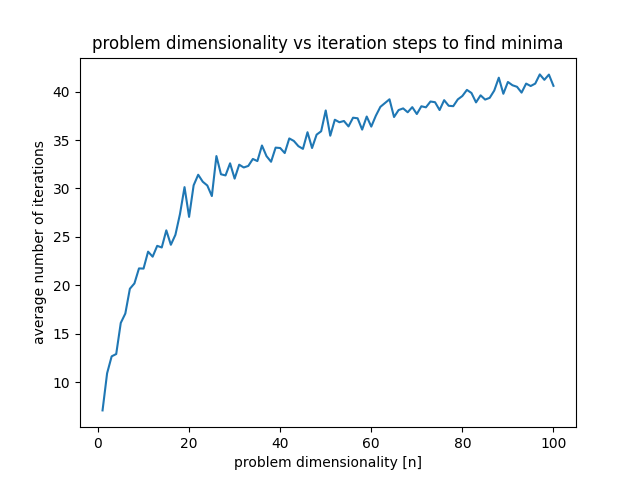

In [97]:
plt.figure()
plt.plot(n_vals, ave_it_vals)
plt.xlabel("problem dimensionality [n]")
plt.ylabel("average number of iterations")
plt.title("problem dimensionality vs iteration steps to find minima")
plt.show()

### Probelm 3

In [127]:
#define new function
x, y, a, b, c, d = sym.symbols('x y a b c d')
f = sym.Matrix([(x -a)**2 + (x-a) * (y-b)+(y-b)**2])
x_0 = c
y_0 = d

g = sym.Matrix([x, y]) - f.jacobian([x,y]).jacobian([x,y]).inv() * f.jacobian([x,y]).T

#Display Symbolic Equation
display(g)

Matrix([
[a],
[b]])

### why is this type of problem useful to solve?
instead of simple gradient descent this is taking into account the curvature of the function, i.e. the second derivative as well

In [133]:
f.jacobian([x,y]).T

Matrix([
[-2*a - b + 2*x + y],
[-a - 2*b + x + 2*y]])

In [129]:
# rerun problem 2 code substituting the above update rule for the previous
def x_init_gen(dim):
    x_inits = (np.zeros((dim,1)) - 10) +  np.random.rand(dim,1) * 20
    return x_inits
#define our function that performs gradient descent on ambigiously dimensonal funcs
#creates random x and Q per descent
def ambig_dim_grad_desc_2(dim, grad, update_eq):
    eps = 0.1
    num_its = 0
    x_last = sym.Matrix([c, d]) 
    grad = grad_f_lam(x_last)
    mag_grad = np.linalg.norm(grad)
    while (mag_grad > eps):
        x_next = x - g
        grad = grad_f_lam(x_next, Q)
        mag_grad = np.linalg.norm(grad)
        x = x_next
        num_its = num_its + 1
    return num_its

### Probelm 4

In [304]:
#define symbols
theta, u1, u2 = sym.symbols('theta u_1 u_2')
q = sym.Matrix([x, y, theta])
u = np.array([1, -1/2])
#get lambda eq for update
qdot = sym.lambdify([q], sym.Matrix([sym.cos(theta)*u[0], sym.sin(theta)*u[0], u[1]]))
#get init conditions and controls
q_init = np.array([0,0,np.pi/2])

T = 2 * np.pi

In [306]:
#tommy's rk4
def integrate(f,x0,dt):
    k1=dt*np.squeeze(f(x0))
    k2=dt*np.squeeze(f(x0+k1/2.))
    k3=dt*np.squeeze(f(x0+k2/2.))
    k4=dt*np.squeeze(f(x0+k3))
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

In [308]:
def simulate(f,x0, tspan,dt):
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj   

In [300]:
def dynamics(q):
    q_dot = qdot(q)
    return q_dot

In [310]:
tspan = [0, T]
dt = 0.01
# N = int((max(tspan)-min(tspan))/dt)
# tvec = np.linspace(min(tspan),max(tspan),N)
xvec = simulate(dynamics, q_init,tspan, dt)
# tvec = np.linspace(min(tspan),max(tspan),N)

<IPython.core.display.Javascript object>


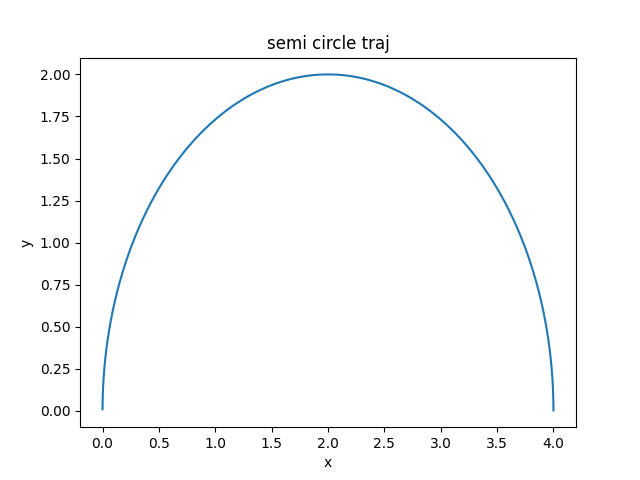

In [312]:
plt.figure()
plt.plot(xvec[0,:], xvec[1,:])
plt.title("semi circle traj")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [287]:
xvec.shape


(3, 628)